# K-Nearest Neighbors (KNN) Implementation

This notebook implements a K-Nearest Neighbors (KNN) classifier from scratch. The implementation includes:
- Data generation for two classes
- Distance calculation
- Neighbor finding
- Classification
- Visualization of results

Originally created by: hilmi

## 1. Import Required Libraries and Set Random Seed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

## 2. Generate Synthetic Data

Create two classes of data points with different centers:

In [2]:
# Generate 50 points for Class 0
class0 = np.random.randn(50, 2) + np.array([2, 2])

# Generate 50 points for Class 1
class1 = np.random.randn(50, 2) + np.array([7, 7])

# Combine the data
X_train = np.vstack((class0, class1))
y_train = np.array([0]*50 + [1]*50)

## 3. Define Core Functions

### 3.1 Euclidean Distance Function

In [3]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.
    
    Parameters:
        point1 (array-like): Coordinates of the first point.
        point2 (array-like): Coordinates of the second point.
    
    Returns:
        float: Euclidean distance.
    """
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

### 3.2 K-Nearest Neighbors Function

In [4]:
def get_k_neighbors(X_train, y_train, test_point, k):
    """
    Find the k nearest neighbors of the test_point.
    
    Parameters:
        X_train (ndarray): Training feature data.
        y_train (ndarray): Training labels.
        test_point (array-like): The data point to classify.
        k (int): Number of neighbors to find.
    
    Returns:
        list: Labels of the k nearest neighbors.
    """
    distances = []
    for idx, point in enumerate(X_train):
        distance = euclidean_distance(point, test_point)
        distances.append((distance, y_train[idx]))
    # Sort based on distance
    distances.sort(key=lambda x: x[0])
    # Get the labels of the k nearest neighbors
    neighbors = [label for (_, label) in distances[:k]]
    return neighbors

### 3.3 Classification Function

In [5]:
def predict_classification(X_train, y_train, test_point, k):
    """
    Predict the class of the test_point based on k nearest neighbors.
    
    Parameters:
        X_train (ndarray): Training feature data.
        y_train (ndarray): Training labels.
        test_point (array-like): The data point to classify.
        k (int): Number of neighbors to consider.
    
    Returns:
        int: Predicted class label.
    """
    neighbors = get_k_neighbors(X_train, y_train, test_point, k)
    # Count the occurrences of each class in neighbors
    vote_counts = Counter(neighbors)
    # Select the class with the highest count
    predicted_class = vote_counts.most_common(1)[0][0]
    return predicted_class

### 3.4 Visualization Function

In [6]:
def plot_knn_classification(X_train, y_train, test_point, k):
    """
    Plot the kNN classification result for a single test point.
    
    Parameters:
        X_train (ndarray): Training feature data.
        y_train (ndarray): Training labels.
        test_point (array-like): The data point to classify.
        k (int): Number of neighbors to consider.
    """
    
    predicted_class = predict_classification(X_train, y_train, test_point, k)
    
    # Separate the training points by class for plotting
    class0 = X_train[y_train == 0]
    class1 = X_train[y_train == 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
    plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Class 1')
    
    # Highlight the test point
    plt.scatter(test_point[0], test_point[1], color='green', marker='*', s=200, label='Test Point')
    
    # Find the k nearest neighbors
    distances = [euclidean_distance(point, test_point) for point in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_points = X_train[nearest_indices]
    
    # Plot neighbors
    plt.scatter(nearest_points[:, 0], nearest_points[:, 1], 
                facecolors='none', edgecolors='k', s=150, 
                label=f'{k} Nearest Neighbors')
    
    # Draw lines from test point to neighbors
    for neighbor in nearest_points:
        plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]], 'k--', linewidth=0.5)
    
    plt.title(f'kNN Classification (k={k})\nPredicted Class: {predicted_class}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

## 4. Example Usage

Let's test our KNN implementation with multiple test points:

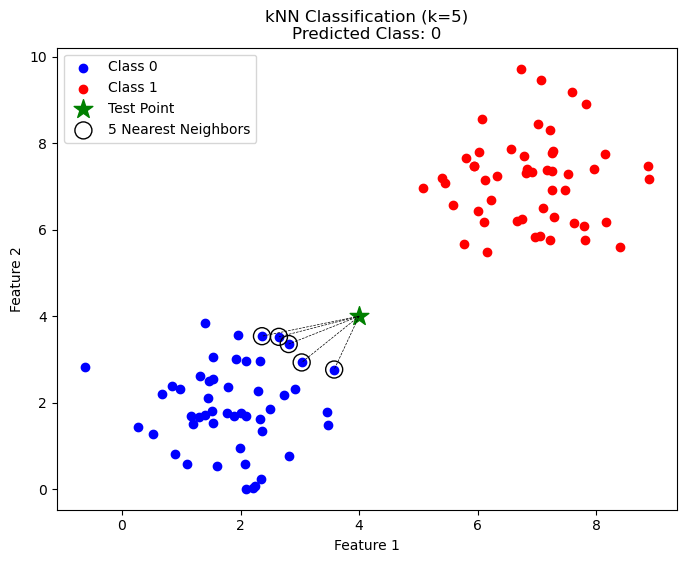

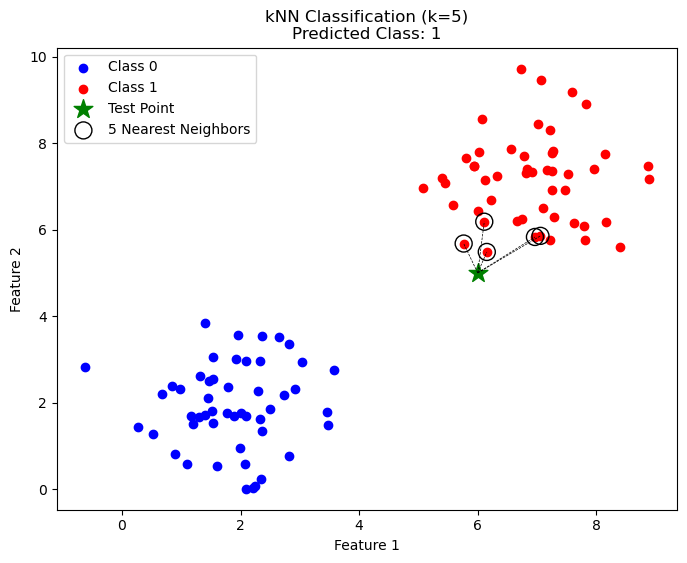

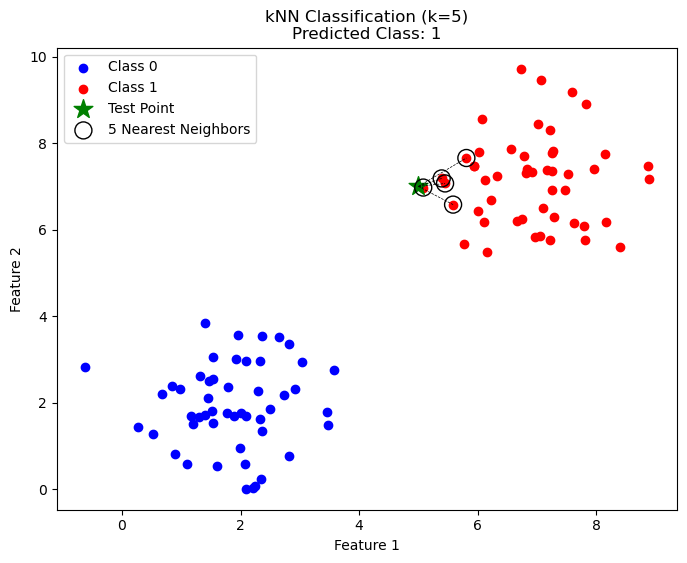

In [7]:
test_points = [np.array([4, 4]), np.array([6, 5]), np.array([5, 7])]

for tp in test_points:
    plot_knn_classification(X_train, y_train, tp, k=5)